In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

In [243]:
#한글 폰트 적용하기/ 보통  맑은 고딕체 사용
from matplotlib import font_manager, rc
font = 'C:/Windows/Fonts/Malgun.ttf'
font_name = font_manager.FontProperties(fname=font).get_name()
rc('font', family=font_name)

In [ ]:
## 충북,충남,대전,세종 사망자 교통사고 (2012-2014)

In [199]:
df=pd.read_csv('오재선_주제제안_3/2012_2014_교통사망사고정보.csv',encoding='cp949')

In [165]:
df['발생지시도'].value_counts()

발생지시도
경기    2777
경북    1511
경남    1302
전남    1274
충남    1188
서울    1173
전북    1007
충북     783
강원     703
부산     596
대구     545
인천     486
울산     330
광주     311
대전     310
제주     275
세종      53
Name: count, dtype: int64

In [200]:
df=df[df['발생지시도'].isin(['세종','대전','충북','충남'])]

In [201]:
df=df.drop(['당사자종별_1당_대분류', '당사자종별_1당', '당사자종별_2당_대분류',
       '당사자종별_2당', '발생위치X_UTMK', '발생위치Y_UTMK', '경도', '위도','발생년','발생분','도로형태_대분류','사고유형_대분류','사고유형_중분류'], axis=1)

In [202]:
df['사상자수'] = df['사망자수'] + df['중상자수']+ df['사상자수'] + df['경상자수'] + df['부상신고자수']

In [203]:
df.drop(['사망자수','중상자수','경상자수','부상신고자수'], axis=1, inplace=True)
df

,발생년월일시,주야,요일,사상자수,발생지시도,발생지시군구,사고유형,법규위반_대분류,법규위반,도로형태
7,2012-09-17 14:00,주간,월,2,충남,논산시,공작물충돌,운전자법규위반,안전운전 의무 불이행,기타단일로
21,2012-01-01 04:00,야간,일,4,충남,서산시,공작물충돌,운전자법규위반,안전운전 의무 불이행,기타단일로
26,2012-01-06 23:00,야간,금,2,대전,유성구,횡단중,운전자법규위반,안전운전 의무 불이행,기타단일로
27,2012-01-05 10:00,주간,목,2,충남,태안군,기타,운전자법규위반,안전운전 의무 불이행,기타/불명
39,2012-01-01 08:00,주간,일,2,충남,청양군,공작물충돌,운전자법규위반,안전운전 의무 불이행,기타단일로
...,...,...,...,...,...,...,...,...,...,...
14580,2014-06-20 12:00,주간,금,2,충남,천안시,전도전복,운전자법규위반,안전운전 의무 불이행,기타단일로
14581,2014-05-19 12:00,주간,월,2,충남,홍성군,주/정차차량 충돌,운전자법규위반,안전운전 의무 불이행,기타단일로
14598,2014-06-01 15:00,주간,일,4,대전,동구,도로이탈 추락,운전자법규위반,안전운전 의무 불이행,기타단일로
14608,2014-05-11 01:00,야간,일,4,충남,천안시,진행중 추돌,운전자법규위반,안전운전 의무 불이행,기타단일로


In [204]:
df['발생년월일시']=pd.to_datetime(df['발생년월일시'])
df['발생년월일시']

7       2012-09-17 14:00:00
21      2012-01-01 04:00:00
26      2012-01-06 23:00:00
27      2012-01-05 10:00:00
39      2012-01-01 08:00:00
                ...        
14580   2014-06-20 12:00:00
14581   2014-05-19 12:00:00
14598   2014-06-01 15:00:00
14608   2014-05-11 01:00:00
14612   2014-05-14 19:00:00
Name: 발생년월일시, Length: 2334, dtype: datetime64[ns]

In [171]:
clm_12=pd.read_csv('오재선_주제제안_3/기후_충청권/2012_편집_OBS_ASOS_TIM_20240309201122.csv',encoding='cp949')
clm_13=pd.read_csv('오재선_주제제안_3/기후_충청권/2013_편집_OBS_ASOS_TIM_20240310114858.csv',encoding='cp949')
clm_14=pd.read_csv('오재선_주제제안_3/기후_충청권/2014_편집_OBS_ASOS_TIM_20240309200737.csv',encoding='cp949')

In [205]:
clm_all=pd.concat([clm_12, clm_13, clm_14],axis=0, ignore_index=True )

In [206]:
clm_all['일시']=pd.to_datetime(clm_all['일시'])
clm_all.columns = ['지점명', '일시', '기온','강수량','풍속','적설','시정','지면온도']

In [207]:
df['일시']=df['발생년월일시']
df=df.drop(['발생년월일시'],axis=1)

In [208]:
df['일시']=pd.to_datetime(df['일시'])

In [ ]:
print(df.shape, clm_all.shape)

In [ ]:
# merged_df = pd.concat([df, clm_all]).drop_duplicates().sort_values(by='일시')
# merged_df.info()

In [209]:
df_merge=pd.merge(df, clm_all, on='일시', how='left')
df_merge.shape

(24898, 17)

In [ ]:
# 충청권으로 할 경우 구분해서 지정해줘야함!!!!
print(df['발생지시군구'].value_counts())
print(clm_all['지점명'].value_counts())

In [210]:
df_merge.duplicated(df).sum()

22565

In [211]:
df_merge=df_merge.drop_duplicates(df) 
df_merge.shape

(2333, 17)

In [155]:
df_merge['사고유형'].value_counts()

사고유형
기타            589
횡단중           425
측면직각충돌        293
공작물충돌         259
진행중 추돌        167
정면충돌          156
전도전복          129
주정차중 추돌        75
차도통행중          65
도로이탈 추락        59
길가장자리구역통행중     51
도로이탈 기타        35
보도통행중          29
주/정차차량 충돌       1
Name: count, dtype: int64

In [212]:
df_merge['사고유형']=df_merge['사고유형'].replace(to_replace=['측면직각충돌','공작물충돌','정면충돌','주/정차차량 충돌'], value='충돌')
df_merge['사고유형']=df_merge['사고유형'].replace(to_replace=['진행중 추돌','주정차중 추돌'], value='추돌')
df_merge['사고유형']=df_merge['사고유형'].replace(to_replace=['횡단중','차도통행중','보도통행중','길가장자리구역통행중'], value='보행')
df_merge['사고유형']=df_merge['사고유형'].replace(to_replace=['도로이탈 추락','도로이탈 기타'], value='도로이탈')

df_merge['사고유형'].value_counts()

사고유형
충돌      709
기타      589
보행      570
추돌      242
전도전복    129
도로이탈     94
Name: count, dtype: int64

In [213]:
# 범주 구분해야?
df_merge['법규위반'].value_counts()

법규위반
안전운전 의무 불이행        1658
중앙선 침범              198
신호위반                165
보행자 보호의무 위반          82
교차로 통행방법 위반          60
과속                   55
직진 및 우회전차의 통행방해      36
안전거리 미확보             30
기타(운전자법규위반)          18
부당한 회전               11
차로위반(진로변경 위반)         8
앞지르기 금지위반             6
서행 및 일시정지위반           4
앞지르기 방법위반             2
Name: count, dtype: int64

In [214]:
df_merge.drop('법규위반_대분류', axis=1, inplace=True)

In [215]:
df_merge['도로형태'].value_counts()

도로형태
기타단일로     1408
교차로내       460
교차로부근      247
기타/불명       79
횡단보도상       62
교량위         26
횡단보도부근      25
터널안         10
고가도로위        9
지하도로내        7
Name: count, dtype: int64

In [216]:
df_merge['도로형태']=df_merge['도로형태'].replace(to_replace=['횡단보도상','횡단보도부근'], value='횡단보도')
df_merge['도로형태']=df_merge['도로형태'].replace(to_replace=['교량위','터널안','고가도로위','지하도로내'], value='교량_터널_고가지하도로')

In [186]:
df_merge.isna().sum()

주야           0
요일           0
사상자수         0
발생지시도        0
발생지시군구       0
사고유형         0
법규위반         0
도로형태         0
일시           0
지점명          0
기온           0
강수량       2153
풍속           0
적설        2309
시정        2323
지면온도         0
dtype: int64

In [217]:
df_fill=df_merge.fillna({'강수량': 0, '적설': 0})

In [218]:
df_merge[df_merge['지점명'].isna()==True]

,주야,요일,사상자수,발생지시도,발생지시군구,사고유형,법규위반,도로형태,일시,지점명,기온,강수량,풍속,적설,시정,지면온도


In [219]:
df_fill.isna().sum()

주야           0
요일           0
사상자수         0
발생지시도        0
발생지시군구       0
사고유형         0
법규위반         0
도로형태         0
일시           0
지점명          0
기온           0
강수량          0
풍속           0
적설           0
시정        2323
지면온도         0
dtype: int64

In [220]:
df_fill['시정'].value_counts()

시정
600.0     3
300.0     2
700.0     1
800.0     1
120.0     1
1500.0    1
900.0     1
Name: count, dtype: int64

In [221]:
df_fill.drop('시정', axis=1, inplace=True)

In [222]:
df_fill.isna().sum()

주야        0
요일        0
사상자수      0
발생지시도     0
발생지시군구    0
사고유형      0
법규위반      0
도로형태      0
일시        0
지점명       0
기온        0
강수량       0
풍속        0
적설        0
지면온도      0
dtype: int64

In [223]:
df_fill.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2333 entries, 0 to 24887
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   주야      2333 non-null   object        
 1   요일      2333 non-null   object        
 2   사상자수    2333 non-null   int64         
 3   발생지시도   2333 non-null   object        
 4   발생지시군구  2333 non-null   object        
 5   사고유형    2333 non-null   object        
 6   법규위반    2333 non-null   object        
 7   도로형태    2333 non-null   object        
 8   일시      2333 non-null   datetime64[ns]
 9   지점명     2333 non-null   object        
 10  기온      2333 non-null   float64       
 11  강수량     2333 non-null   float64       
 12  풍속      2333 non-null   float64       
 13  적설      2333 non-null   float64       
 14  지면온도    2333 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(8)
memory usage: 291.6+ KB


In [ ]:
### 이제부턴 머신러닝 본격 전처리

In [226]:
## 발생지 기준을 뭘로 할지 결정/ 일시를 봄,여름,가을로 나눌것/ 독립변수 좀더 고민필요
df_ml=df_fill.drop(['발생지시군구','지점명','일시', '법규위반','사고유형'],axis=1)
df_ml

,주야,요일,사상자수,발생지시도,도로형태,기온,강수량,풍속,적설,지면온도
0,주간,월,2,충남,기타단일로,17.7,10.5,3.1,0.0,18.6
11,야간,일,4,충남,기타단일로,-1.5,0.0,0.2,0.0,-1.6
22,야간,금,2,대전,기타단일로,-7.4,0.0,1.4,0.0,-5.1
33,주간,목,2,충남,기타/불명,-8.1,0.0,0.7,0.0,-4.5
44,주간,일,2,충남,기타단일로,-3.5,0.0,0.3,0.0,-2.3
...,...,...,...,...,...,...,...,...,...,...
24843,주간,금,2,충남,기타단일로,27.1,0.0,1.8,0.0,35.4
24854,주간,월,2,충남,기타단일로,25.4,0.0,2.3,0.0,37.9
24865,주간,일,4,대전,기타단일로,29.7,0.0,2.9,0.0,37.4
24876,야간,일,4,충남,기타단일로,16.4,0.0,2.5,0.0,13.0


In [228]:
df_dum=pd.get_dummies(df_ml)
df_dum.shape

(2333, 25)

In [230]:
X=df_dum.drop('사상자수', axis=1)
y=df_dum['사상자수']
print(X.shape, y.shape)

(2333, 24) (2333,)


In [231]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)
print(X_train.shape, y_train.shape, X_train.shape)

(1866, 24) (1866,) (1866, 24)


In [232]:
def get_model_cv_prediction(model, X, y):
    neg_mse_scores = cross_val_score(model, X, y,scoring="neg_mean_squared_error", cv = 5)
    rmse_scores = np.sqrt(-1 * neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print(' ',model.__class__.__name__ , ' ')
    print(' 5 교차 검증의 평균 RMSE : {0:.3f} '.format(avg_rmse))

In [241]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
rf_reg=RandomForestRegressor(random_state=0, n_estimators=100)
sgd_reg=SGDRegressor(alpha=0.1)
dt_reg = DecisionTreeRegressor(random_state=0, max_depth=4)
gb_reg = GradientBoostingRegressor(random_state=0, n_estimators=1000)
xgb_reg = XGBRegressor(random_state=0, n_estimators=1000)
models = [rf_reg,sgd_reg,dt_reg, gb_reg, xgb_reg]
for model in models: 
    get_model_cv_prediction(model, X, y)

  SGDRegressor  
 5 교차 검증의 평균 RMSE : 3.579 
  DecisionTreeRegressor  
 5 교차 검증의 평균 RMSE : 4.173 
  GradientBoostingRegressor  
 5 교차 검증의 평균 RMSE : 4.314 
  XGBRegressor  
 5 교차 검증의 평균 RMSE : 4.516 


In [237]:
alphas=[0, 0.01, 0.1, 1, 10]
for alpha in alphas:
    sgd_reg=SGDRegressor(alpha=alpha)
    neg_mse_scores=cross_val_score(sgd_reg,X,y, scoring='neg_mean_squared_error',cv=5)
    avg_rmse= np.mean(np.sqrt(-1*neg_mse_scores))
    print(f'alpha {alpha} 일 때 5fold의 평균 RMSE: {avg_rmse:.3f}')

alpha 0 일 때 5fold의 평균 RMSE: 126.416
alpha 0.01 일 때 5fold의 평균 RMSE: 443077.374
alpha 0.1 일 때 5fold의 평균 RMSE: 3.573
alpha 1 일 때 5fold의 평균 RMSE: 4.469
alpha 10 일 때 5fold의 평균 RMSE: 3.530


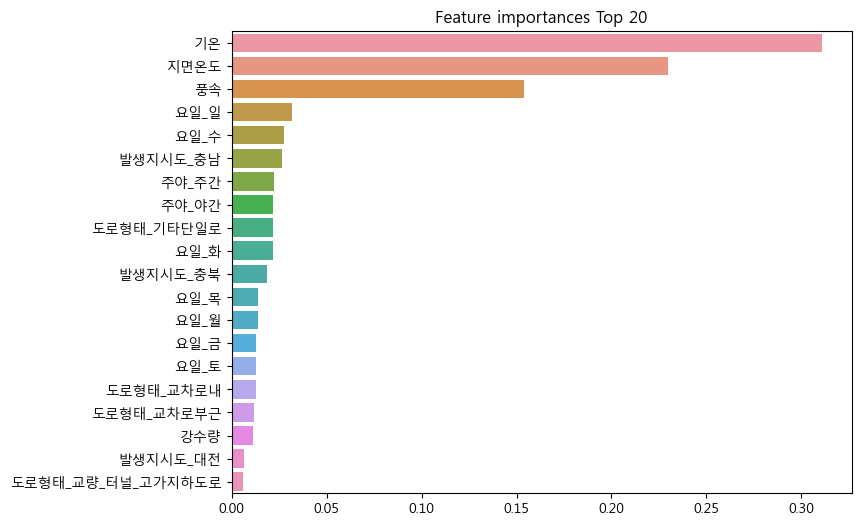

In [244]:
from sklearn.ensemble import RandomForestRegressor

rf_reg=RandomForestRegressor(random_state=0, n_estimators=100)
rf_reg.fit(X, y)
ftr_importances_values = rf_reg.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

In [249]:
df_dum['사상자수'].sort_values()

0         2
15263     2
15243     2
15233     2
15213     2
         ..
682      36
7662     40
13363    48
6963     52
7141     86
Name: 사상자수, Length: 2333, dtype: int64

In [250]:
df_dum['사상자수'].value_counts()

사상자수
2     1682
4      354
6      130
8       68
10      43
14      14
12      12
16      10
18       4
22       4
24       3
20       2
36       1
52       1
86       1
26       1
40       1
48       1
30       1
Name: count, dtype: int64